INMERSIÓN DE DATOS CON PYTHON

**CLASE 01:** Preprocesamiento y Exploración De Datos

#**PROBLEMA DE NEGOCIO**


---


La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

In [1]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount("/content/Drive")
warnings.filterwarnings("ignore")

Mounted at /content/Drive


In [2]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersion/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df_banco.shape

(1000, 21)

In [5]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [8]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [9]:
dic = {'yes':1,'no':0} # comentar
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [10]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [11]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
276,0,4,18,5,5,2404,5,3,2,2,1,2,3,26,3,2,2,3,1,0,NaN
661,1,1,12,3,1,900,1,3,4,4,1,2,3,23,3,2,1,3,1,0,NaN
756,0,3,6,5,1,1299,5,3,1,3,1,1,1,74,3,2,3,1,2,0,NaN


In [12]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [13]:
dic_sexo = {2:1,5:1,1:0,3:0,4:0} # comentar
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [14]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [15]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,NaN,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,NaN,1,0,1,4,6


In [16]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,NaN,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,NaN,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,NaN,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,NaN,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,NaN,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,NaN,1.000000,1.00000,6.000000,6.000000,19.000000


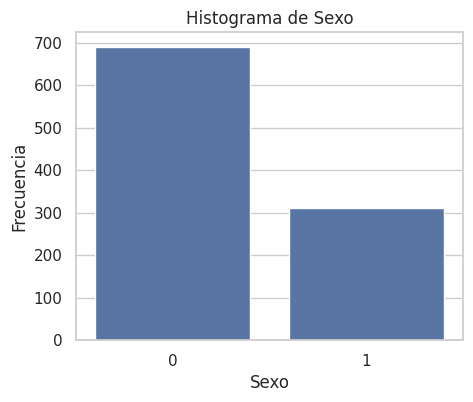

In [17]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [18]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

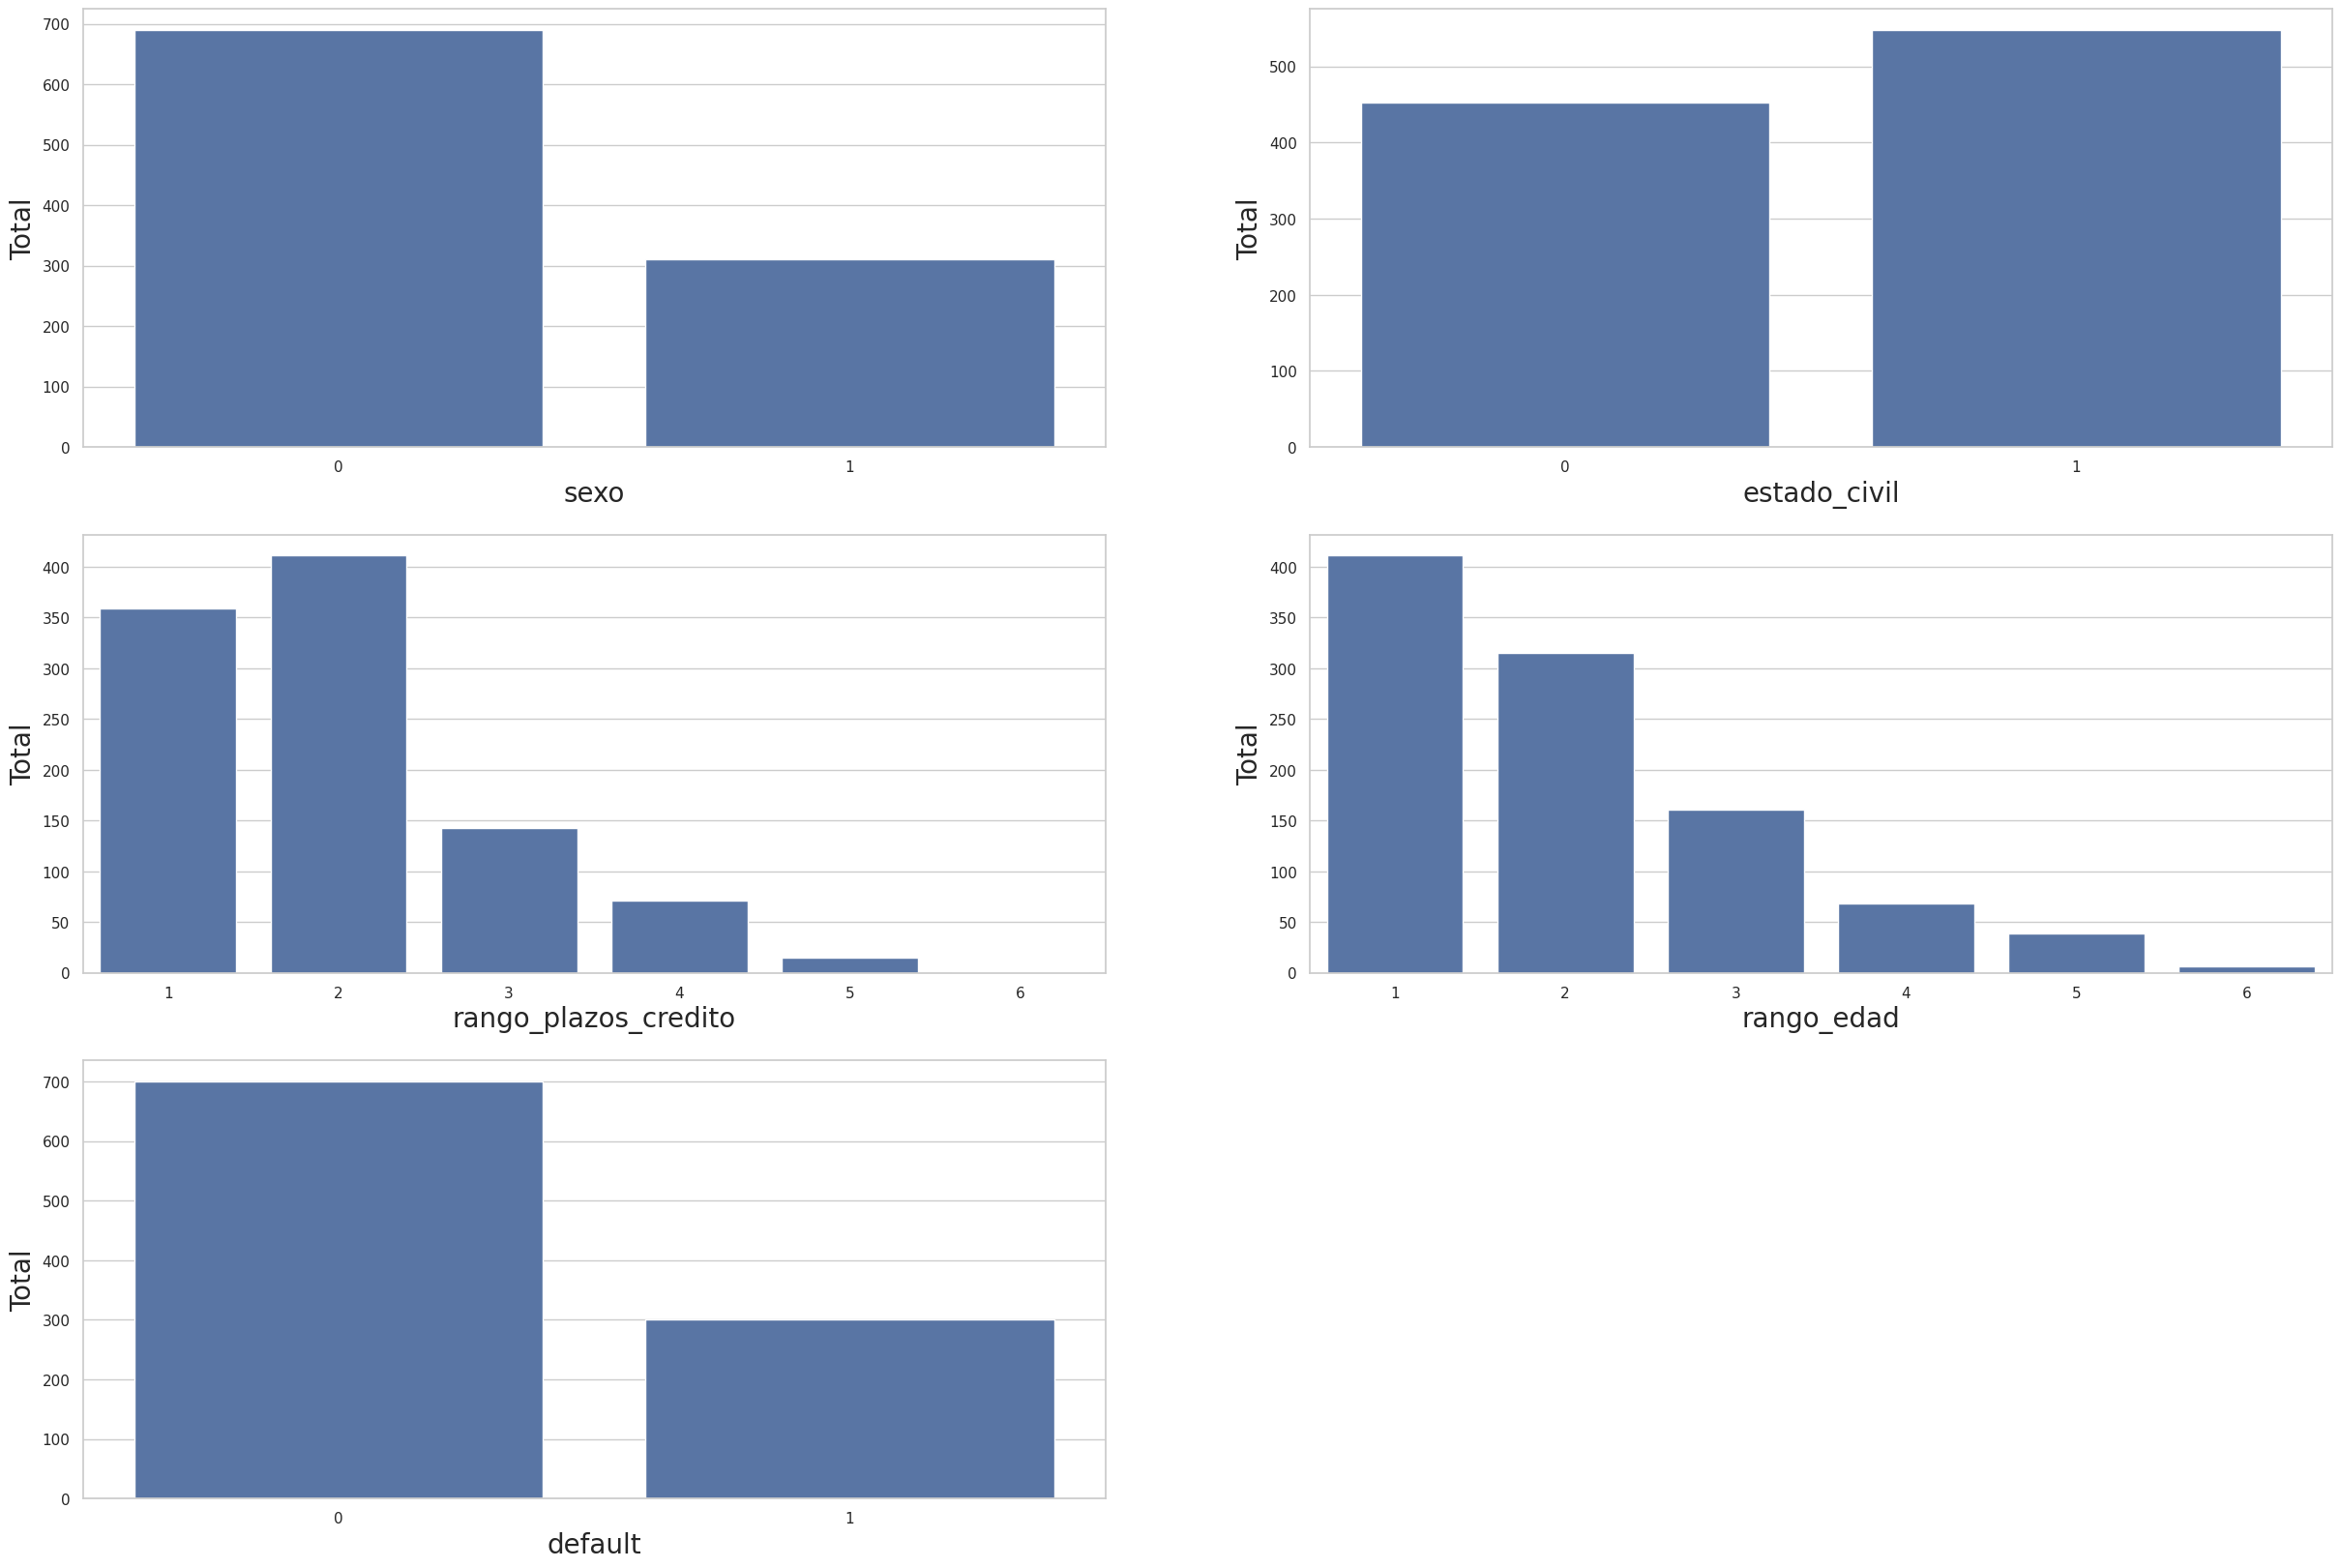

In [19]:
analisis_exploratorio()

# **Desafíos**

## 1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.


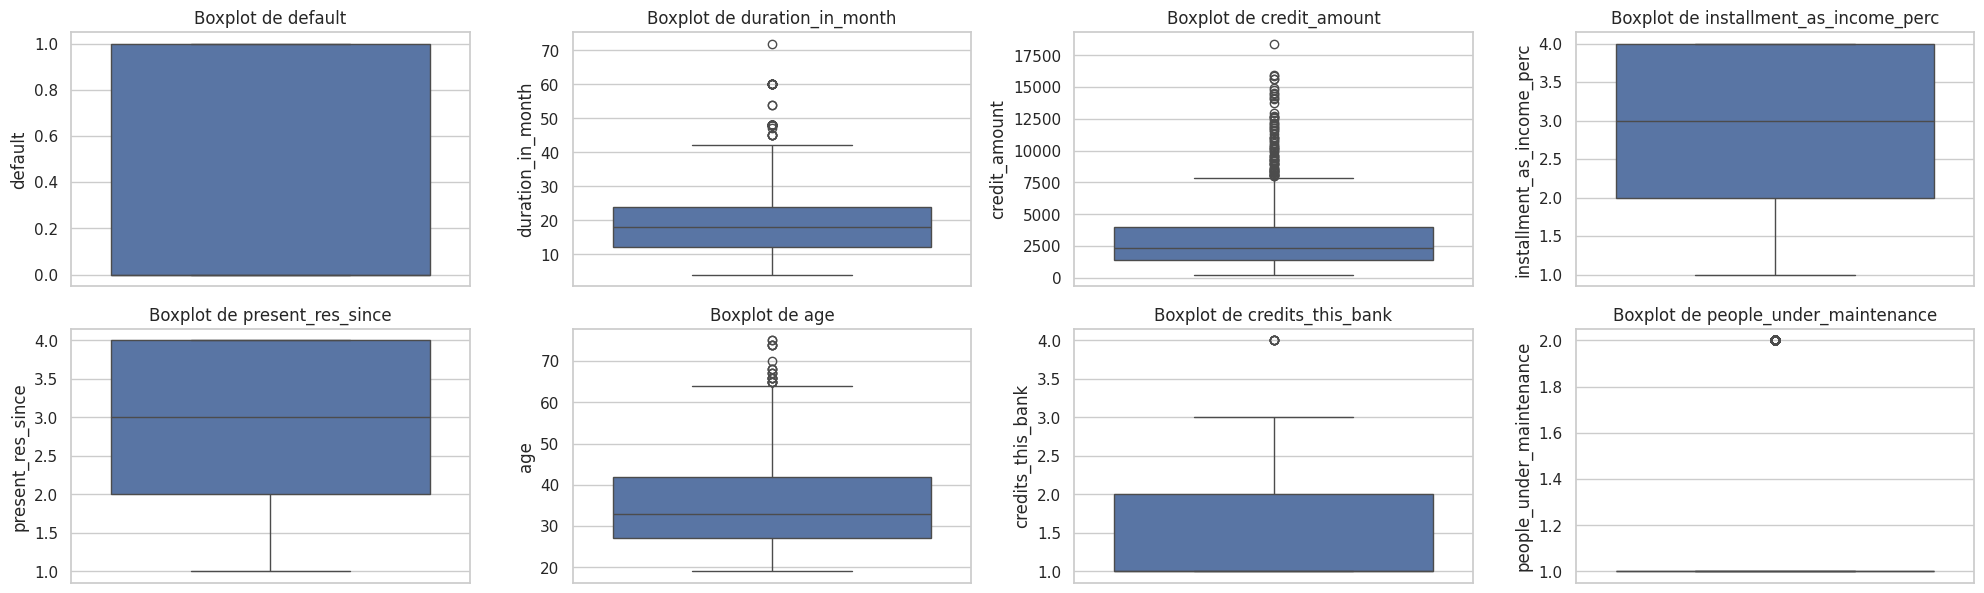

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersion/german_credit.csv')

# Columnas numéricas
columnas_numericas = df_banco.select_dtypes(include=['int64', 'float64']).columns

# Crear gráficos de caja
plt.figure(figsize=(20, 15))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df_banco[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()

# **Análisis de Datos de las Distribuciones**

**Valores Atípicos Identificados:**

- duration_in_month: Se identificaron valores atípicos por encima de los 60 meses.
- credit_amount: Se encontraron numerosos valores atípicos por encima de los 7500 DM.
- age: Se detectaron valores atípicos por encima de los 60 años.
credits_this_bank: Hay un valor atípico con más de 3 créditos.
- people_under_maintenance: Se encontró un valor atípico que sugiere más de 2 personas a cargo.


**Impacto de los Valores Atípicos:**

Los valores atípicos pueden influir en la precisión del modelo de machine learning, especialmente en modelos sensibles a valores extremos, como la regresión lineal.

**Decisión Basada en el Contexto del Proyecto:**

- Relevancia: En el contexto del riesgo crediticio, valores como altos montos de crédito o duraciones largas pueden ser válidos y relevantes. Por ejemplo, un crédito a 72 meses, aunque raro, es posible en ciertos casos.

- Validación: Validar con expertos del dominio si estos valores representan situaciones reales y posibles.

- Modelos Robustos: Considerar el uso de modelos robustos y transformaciones de datos en lugar de eliminar estos valores.

**Estrategia Recomendada**

Dado el contexto de evaluar el riesgo crediticio y la relevancia de los valores atípicos en este dominio, la estrategia recomendada es no eliminar los valores atípicos inmediatamente, sino manejarlos adecuadamente mediante transformaciones y el uso de modelos robustos.

1. Transformaciones de Datos:

Aplicar transformaciones logarítmicas a credit_amount y duration_in_month para reducir el impacto de los valores extremos.

In [25]:
import numpy as np

df_banco['log_credit_amount'] = np.log1p(df_banco['credit_amount'])
df_banco['log_duration_in_month'] = np.log1p(df_banco['duration_in_month'])

**Implementación**

La siguiente implementación muestra cómo aplicar las transformaciones y preparar los datos para el modelo sin eliminar valores atípicos:

   credit_amount  log_credit_amount  duration_in_month  log_duration_in_month
0           1169           7.064759                  6               1.945910
1           5951           8.691483                 48               3.891820
2           2096           7.648263                 12               2.564949
3           7882           8.972464                 42               3.761200
4           4870           8.491055                 24               3.218876


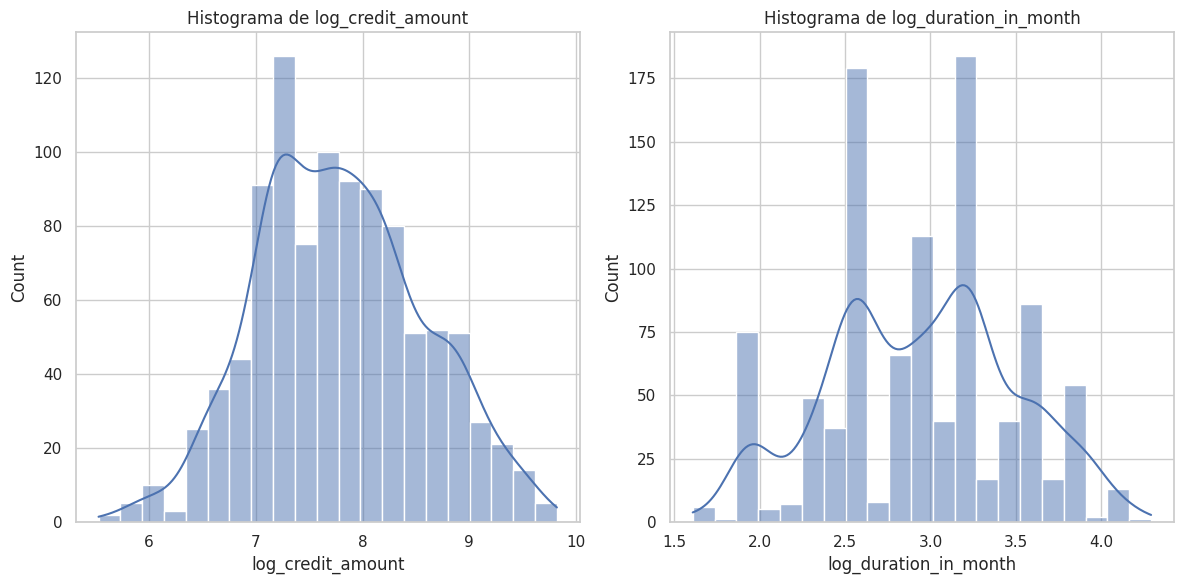

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersion/german_credit.csv')

# Aplicar transformación logarítmica
df_banco['log_credit_amount'] = np.log1p(df_banco['credit_amount'])
df_banco['log_duration_in_month'] = np.log1p(df_banco['duration_in_month'])

# Verificar los nuevos valores transformados
print(df_banco[['credit_amount', 'log_credit_amount', 'duration_in_month', 'log_duration_in_month']].head())

# Revisar los valores transformados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_banco['log_credit_amount'], kde=True)
plt.title('Histograma de log_credit_amount')

plt.subplot(1, 2, 2)
sns.histplot(df_banco['log_duration_in_month'], kde=True)
plt.title('Histograma de log_duration_in_month')
plt.tight_layout()
plt.show()

**Conclusión**

En conclusión, para este desafío se recomienda:

1. No eliminar valores atípicos de inmediato.
2. Aplicar transformaciones logarítmicas a credit_amount y duration_in_month.
3. Usar modelos de machine learning robustos.

Esta estrategia permite manejar los valores atípicos adecuadamente sin perder información valiosa para el modelo de evaluación de riesgo crediticio.

# 2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.


**¿Qué es un Mapa de Calor?**

Un mapa de calor es una representación gráfica de datos en una matriz en la que los valores individuales contenidos en la matriz se representan como colores. En el análisis de datos, los mapas de calor se utilizan a menudo para visualizar la matriz de correlación, que muestra la relación entre múltiples variables en un conjunto de datos.

**Correlación de las Variables**

La correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Los valores de correlación varían entre -1 y 1:

- 1 indica una correlación positiva perfecta.
- -1 indica una correlación negativa perfecta.
- 0 indica que no hay correlación.

**Cómo Crear un Mapa de Calor para Analizar la Correlación de las Variables
Calcular la Matriz de Correlación:**

- Utiliza el método corr() de un DataFrame de Pandas para calcular la matriz de correlación.

**Crear el Mapa de Calor:**

- Utiliza la librería Seaborn para crear el mapa de calor. Seaborn proporciona una función llamada heatmap() que es ideal para este propósito.

## **Implementación Paso a Paso**
Paso 1: Calcular la Matriz de Correlación

In [30]:
import pandas as pd

# Cargar los datos
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersion/german_credit.csv')

# Seleccionar solo las columnas numéricas
df_numeric = df_banco.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
matriz_correlacion = df_numeric.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

                             default  duration_in_month  credit_amount  \
default                     1.000000           0.214927       0.154739   
duration_in_month           0.214927           1.000000       0.624984   
credit_amount               0.154739           0.624984       1.000000   
installment_as_income_perc  0.072404           0.074749      -0.271316   
present_res_since           0.002967           0.034067       0.028926   
age                        -0.091127          -0.036136       0.032716   
credits_this_bank          -0.045732          -0.011284       0.020795   
people_under_maintenance   -0.003015          -0.023834       0.017142   

                            installment_as_income_perc  present_res_since  \
default                                       0.072404           0.002967   
duration_in_month                             0.074749           0.034067   
credit_amount                                -0.271316           0.028926   
installment_as_income_per

Paso 2: Crear el Mapa de Calor

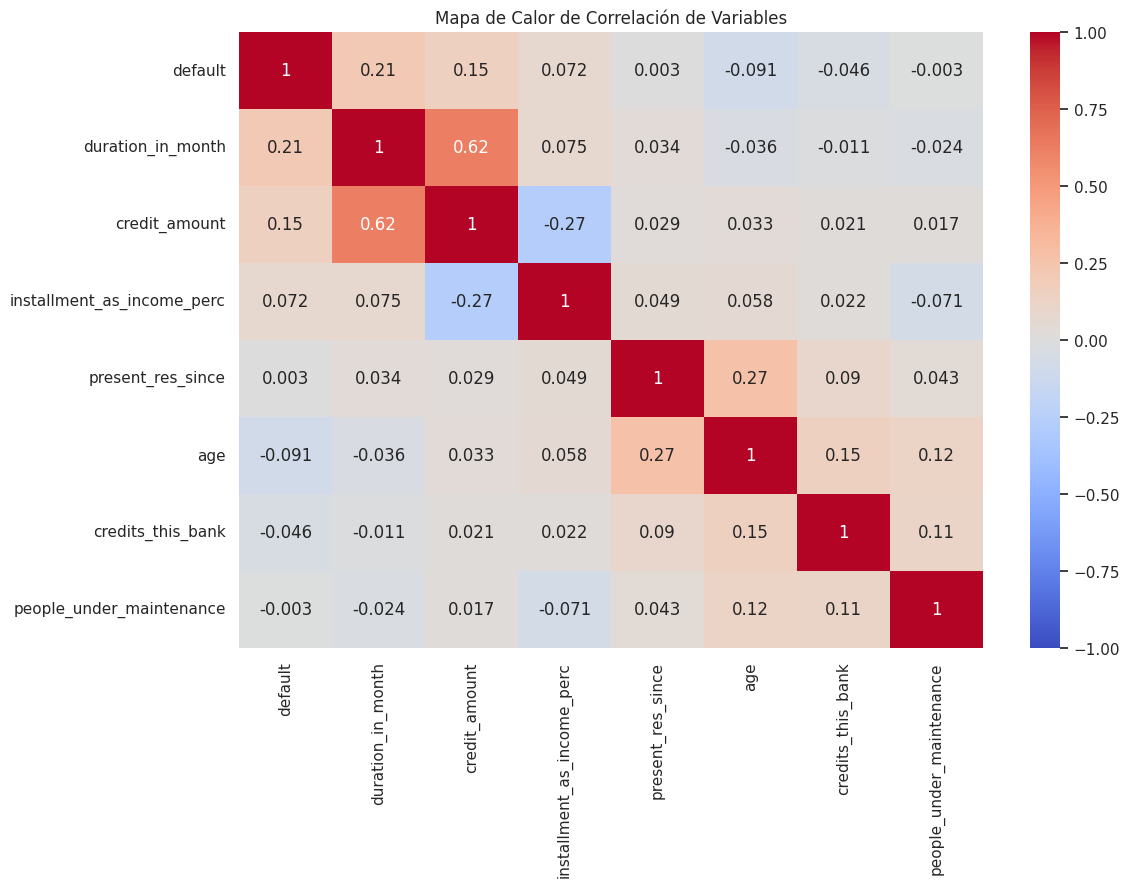

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Título del gráfico
plt.title('Mapa de Calor de Correlación de Variables')

# Mostrar el gráfico
plt.show()

**Conclusión**

El mapa de calor te permitirá visualizar fácilmente las relaciones entre diferentes variables del conjunto de datos. Las celdas de color rojo indican una fuerte correlación positiva, mientras que las celdas de color azul indican una fuerte correlación negativa. Las celdas de color blanco o cercano al blanco indican poca o ninguna correlación.

## 3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

**1. Histograma de Sexo**

**Conclusión:**

- La mayoría de los clientes en el conjunto de datos son hombres (sexo = 0), representando más del doble de la cantidad de mujeres (sexo = 1).

- Esto puede indicar un sesgo en la muestra, donde los hombres son más propensos a solicitar créditos en esta institución.

**2. Histograma de Estado Civil**

**Conclusión:**

- La distribución entre clientes casados (estado_civil = 1) y no casados (estado_civil = 0) es relativamente equilibrada, con una ligera mayoría de clientes casados.

- Esto sugiere que el estado civil podría ser una variable importante a considerar en el análisis del riesgo crediticio.

**3. Histograma de Rango de Plazos de Crédito**

**Conclusión:**

- La mayoría de los créditos tienen plazos cortos, con una gran concentración en los primeros dos rangos.

- Los créditos a plazos más largos son mucho menos comunes, lo cual es típico en productos crediticios donde los riesgos aumentan con plazos más largos.

**4. Histograma de Rango de Edad**

**Conclusión:**

- La mayoría de los clientes se encuentran en el rango de 18 a 30 años, seguido por el rango de 30 a 40 años.

- Esto sugiere que los clientes más jóvenes son más propensos a solicitar créditos en esta institución.

**5. Histograma de Default**

**Conclusión:**

- Un 30% de los clientes han incumplido con sus pagos (default = 1), mientras que el 70% restante no lo ha hecho (default = 0).

- Esta proporción es significativa y sugiere que la variable default es crucial para el análisis del riesgo crediticio.